In [ ]:
pip install imbalanced-learn


In [2]:
# Importing libraries and Loading the Dataset:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")

In [4]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:

df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_train

df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_test

df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0}) 
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})

#For train data
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].astype('category')
df_train = pd.get_dummies(df_train, columns=['Vehicle_Age'])
df_train.head()

#For test data
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Vehicle_Age'])
df_test.head()

#For train Data
df_train['Vehicle_Age_1-2 Year'] = df_train['Vehicle_Age_1-2 Year'].map({True: 1, False: 0})
df_train['Vehicle_Age_< 1 Year'] = df_train['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df_train['Vehicle_Age_> 2 Years'] = df_train['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})

#For test Data
df_test['Vehicle_Age_1-2 Year'] = df_test['Vehicle_Age_1-2 Year'].map({True: 1, False: 0})
df_test['Vehicle_Age_< 1 Year'] = df_test['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df_test['Vehicle_Age_> 2 Years'] = df_test['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})

df_train.shape

# Princple Component Analysis

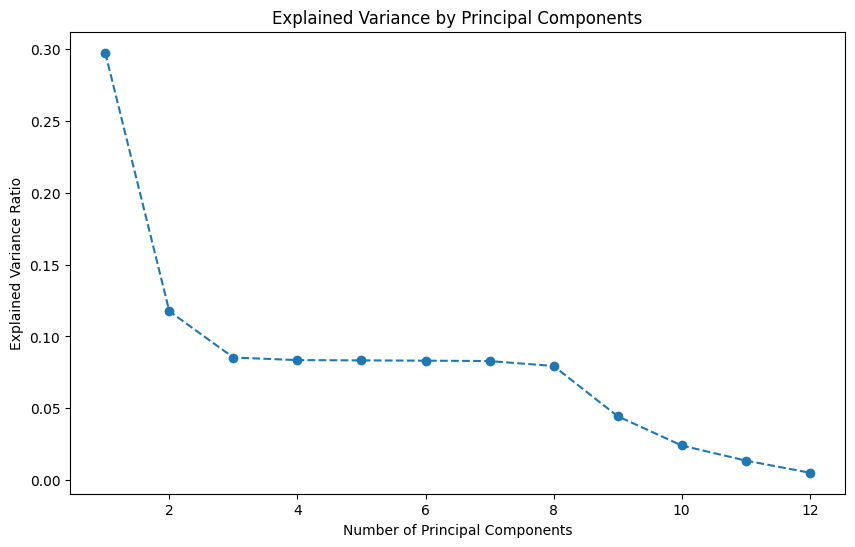

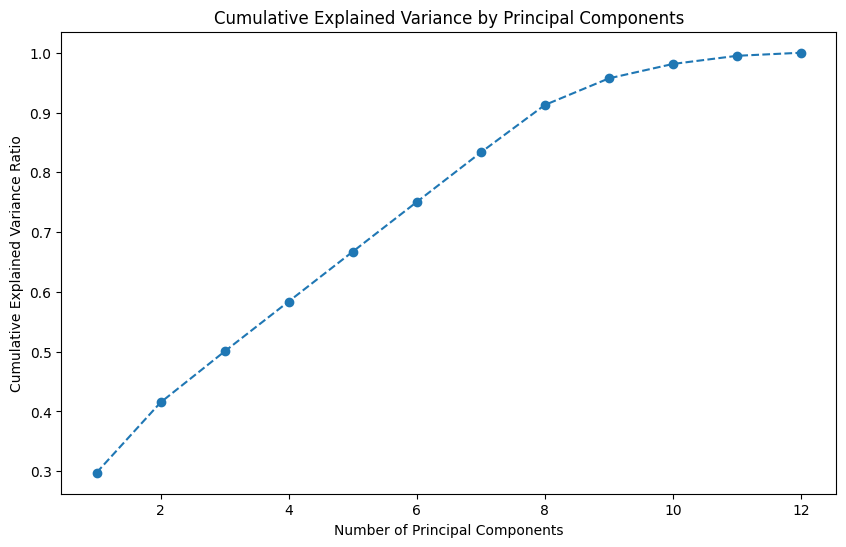

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_train and df_test are already defined as DataFrames
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

# Features and target
X = df_train.drop('Response', axis=1)
y = df_train['Response']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply PCA
pca = PCA(n_components=None)  # None means all components are kept
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


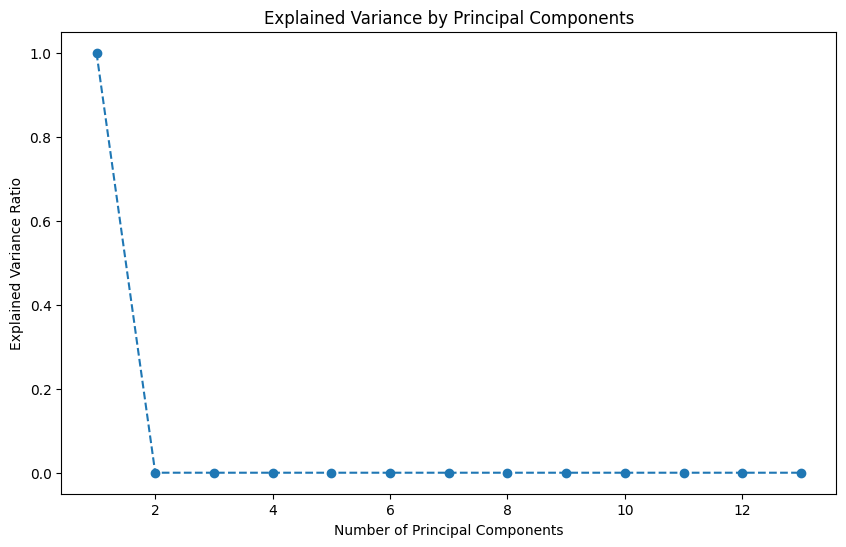

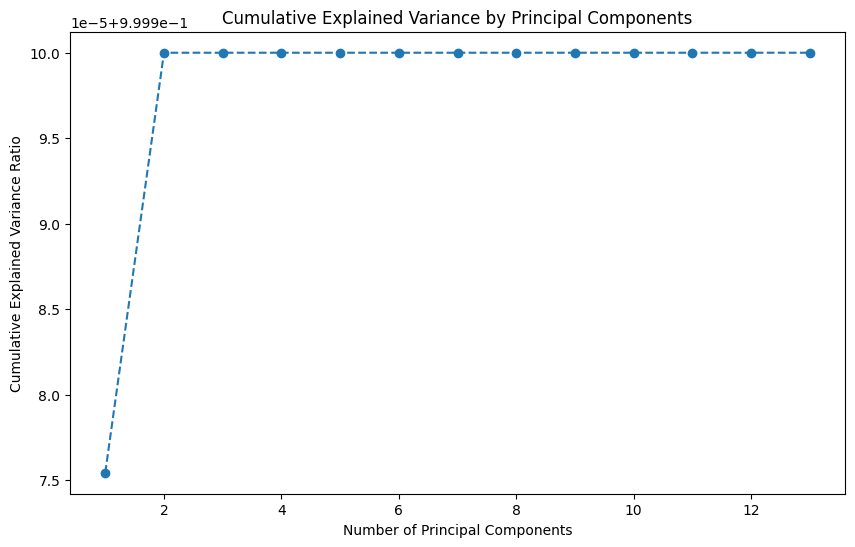

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_train and df_test are already defined as DataFrames
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

# Features and target
X = df_train.drop('Response', axis=1)
y = df_train['Response']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=None)  # None means all components are kept
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [24]:
# df_train.columns
 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

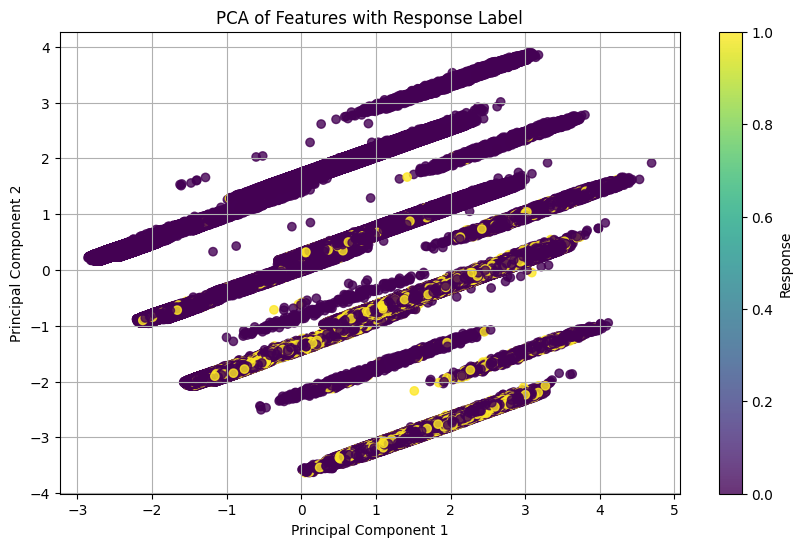

Number of components explaining 99% variance: 11
Significant features contributing to the principal components explaining 99% variance:
Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')
Remaining features after filtering for 99% variance:
['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']
Filtered DataFrame with significant features:
   Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       1   21                1         35.0                   0   
1       1   43                1         28.0                   0   
2       0   25                1         14.0                   1   
3      

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming your data is in a DataFrame df_train with the listed columns
columns = ['Gender', 'Age', 'Driving_License', 'Region_Code',
           'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
           'Policy_Sales_Channel', 'Vintage', 
           'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']

# Selecting only the columns for PCA
data = df_train[columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 99% variance
n_components = np.argmax(cumulative_variance >= 0.99) + 1

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Plotting the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df_train['Response'], cmap='viridis', alpha=0.8)
plt.title('PCA of Features with Response Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding colorbar and labels
cb = plt.colorbar()
cb.set_label('Response')
plt.grid(True)
plt.show()

print(f"Number of components explaining 99% variance: {n_components}")

# Print the columns names that contribute to the 99% variance
feature_contributions = pd.DataFrame(pca.components_, columns=columns, index=[f'PC{i+1}' for i in range(n_components)])

# Set a threshold for significant contributions
threshold = 0.1

# Filter features with significant contributions
significant_features = (feature_contributions.abs() >= threshold).any(axis=0)
significant_columns = feature_contributions.columns[significant_features]

print("Significant features contributing to the principal components explaining 99% variance:")
print(significant_columns)

# Remove the features that do not contribute significantly
remaining_features = significant_columns.tolist()
print("Remaining features after filtering for 99% variance:")
print(remaining_features)

# Subset the original DataFrame to keep only the significant columns
filtered_data = df_train[remaining_features]
print("Filtered DataFrame with significant features:")
print(filtered_data.head())


In [10]:
significant_columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

Default metric period is 5 because AUC is/are not implemented for GPU


Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8791873564050128
Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8791078506362562
Precision Score of CatBoostClassifier model is: 0.5698685090260753
Recall Score of CatBoostClassifier model is: 0.07223571953217696
AUC Score of CatBoostClassifier model is: 0.875248816475372

------------------------------------------------------------------------
Confusion Matrix of CatBoostClassifier model is:


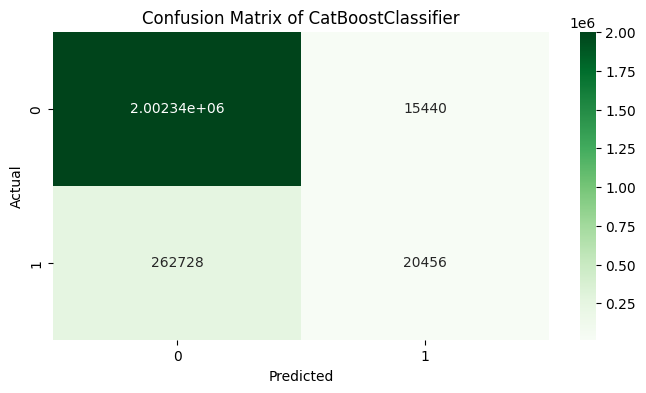

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier

# Assume df_train and df_test are your training and testing DataFrames
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

# Features and target
X = df_train.drop(['Response', 'Vehicle_Age_> 2 Years', 'id'], axis=1)  # Drop 'id' from training set
y = df_train['Response']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(x_train)
X_valid = preprocessor.transform(x_test)

# Ensure the test set has the same columns as the training set
test_features = df_test.drop(['id', 'Vehicle_Age_> 2 Years'], axis=1)
X_test = preprocessor.transform(test_features)

def model_prediction(model):
    model.fit(X_train, y_train)
    x_train_pred = model.predict(X_train)
    x_test_pred = model.predict(X_valid)
    y_test_prob = model.predict_proba(X_valid)[:, 1]

    a = accuracy_score(y_train, x_train_pred)
    b = accuracy_score(y_test, x_test_pred)
    c = precision_score(y_test, x_test_pred)
    d = recall_score(y_test, x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)

    print(f"Accuracy_Score of {model.__class__.__name__} model on Training Data is:", a)
    print(f"Accuracy_Score of {model.__class__.__name__} model on Testing Data is:", b)
    print(f"Precision Score of {model.__class__.__name__} model is:", c)
    print(f"Recall Score of {model.__class__.__name__} model is:", d)
    print(f"AUC Score of {model.__class__.__name__} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model.__class__.__name__} model is:")

    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Greens")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix of {model.__class__.__name__}')
    plt.show()

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(
    depth=6,
    iterations=9000,
    learning_rate=0.1,
    l2_leaf_reg=26.648168065161098,
    min_data_in_leaf=1,
    # subsample=0.8580490989206254,
    rsm=0.5125814118774029, 
    verbose=False
)
model_prediction(model)
############################################################################
# itr=1000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8803332913943075
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8802265141506154
# Precision Score of CatBoostClassifier model is: 0.588905027409455
# Recall Score of CatBoostClassifier model is: 0.08876913949940675
# AUC Score of CatBoostClassifier model is: 0.8780798490630536
########################################################################
# itr=2000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8810235469159714
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.880822787010639
# Precision Score of CatBoostClassifier model is: 0.5823592118806058
# Recall Score of CatBoostClassifier model is: 0.11188838352449292
# AUC Score of CatBoostClassifier model is: 0.8799779810140862 /0.8798
# ############################################################################################
# itr=3000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.881295172731202
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8810005389055003
# Precision Score of CatBoostClassifier model is: 0.5801693900248096
# Recall Score of CatBoostClassifier model is: 0.11973840329962145
# AUC Score of CatBoostClassifier model is: 0.880514043398326
#############################################################################
# itr=4000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.881495523932516
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8811826368124609
# Precision Score of CatBoostClassifier model is: 0.5798688160814515
# Recall Score of CatBoostClassifier model is: 0.12549790948641165
# AUC Score of CatBoostClassifier model is: 0.880921537675376
# 1=35539
# 0=1.99203e+06
############################################################################################
# itr=5000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8816898993658949
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8811995862596481
# Precision Score of CatBoostClassifier model is: 0.5779052993675
# Recall Score of CatBoostClassifier model is: 0.1287360867845641
# AUC Score of CatBoostClassifier model is: 0.8810919502897119
# 1=3656
# 0=199115e+06
# ###########################################################################################
# itr=9000
# Accuracy_Score of CatBoostClassifier model on Training Data is: 0.8820223693637371
# Accuracy_Score of CatBoostClassifier model on Testing Data is: 0.8812404387733815
# Precision Score of CatBoostClassifier model is: 0.575946363789435
# Recall Score of CatBoostClassifier model is: 0.13286767613989492
# AUC Score of CatBoostClassifier model is: 0.8812861590919929
# 1=37626
# 0=199007e+06

In [13]:
# # Predict probabilities on the actual test data
# test_probabilities = model.predict_proba(X_test)[:, 1]

# # Create the submission dataframe
# submission_df = pd.DataFrame({
#     'id': df_test['id'],
#     'Response': test_probabilities
# })

# # Save to CSV
# submission_df.to_csv('Binary_submission11.csv', index=False)


# Logic No.- 2 Using neural network but first checking the accuracy by splitting the train into three part train, Validation and test
## count the number of 1's in the dataset and use the same number of 0's by choosing them randomly from dataset

In [ ]:

df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})


df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})


# #For train Data
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}).astype(pd.Int32Dtype())

# #For test Data
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}).astype(pd.Int32Dtype())

df_train.shape

In [ ]:

# Count the number of 1 values in the 'Response' column
count_ones_response = (df_train['Response'] == 1).sum()
print("Total number of 1 values in the 'Response' column:", count_ones_response)

In [ ]:
# Count the number of 1 values in the 'Response' column
count_ones_response = (df_train['Response'] == 0).sum()
print("Total number of 0 values in the 'Response' column:", count_ones_response)

In [ ]:
df = pd.DataFrame(df_train)

# Count the number of 1 values in the 'Response' column
count_ones_response = (df['Response'] == 1).sum()
print("Total number of 1 values in the 'Response' column:", count_ones_response)

# Filter out the indices of 0 values in the 'Response' column
zero_indices = df[df['Response'] == 0].index

# Randomly sample indices of 0 values
sampled_zero_indices = np.random.choice(zero_indices, count_ones_response, replace=False)
print("Randomly sampled indices of 0 values:", sampled_zero_indices)

# Get the rows with 1 values and sampled 0 values
selected_indices = df[df['Response'] == 1].index.tolist() + sampled_zero_indices.tolist()
df_selected = df.loc[selected_indices]

# Print the total number of 0 values picked
total_zero_values_picked = len(sampled_zero_indices)
print("Total number of 0 values picked:", total_zero_values_picked)

# Save the selected data to a CSV file
df_selected.to_csv('New_trian_data.csv', index=False)
print("Selected data saved to 'selected_data.csv'")

## use the new csv for the next step

In [ ]:
df_new_train = pd.read_csv("/kaggle/working/New_trian_data.csv")
df_new_train.head()

In [ ]:
df_new_train.columns

## scale only the left out feature which are not in the form of 1's and 0's

In [ ]:
columns_to_scale = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel',
'Vintage']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_train[columns_to_scale] = scaler.fit_transform(df_new_train[columns_to_scale])

In [ ]:
df_new_train

## split the train data into train, validation, and test sets


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_new_train.drop('Response', axis=1)
y = df_new_train['Response']
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train = X_train.to_numpy()   
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()


In [ ]:

from tensorflow.keras.utils import to_categorical

y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
y_train

## Train the model on define train, validation and test it on the test data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_val, y_train, y_val are already defined and preprocessed

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'), # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(16, activation='relu'),  # Hidden layer 3
    Dense(1, activation='sigmoid'),  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val).ravel()
val_accuracy = np.mean((val_predictions > 0.5) == y_val)
val_auc = roc_auc_score(y_val, val_predictions)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation AUC: {val_auc:.4f}')


In [ ]:
# Evaluate the model on the training set
train_predictions = model.predict(X_train).ravel()
train_accuracy = np.mean((train_predictions > 0.5) == y_train)
train_auc = roc_auc_score(y_train, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training AUC: {train_auc:.4f}')


In [ ]:
# Evaluate the model on the test set
test_predictions = model.predict(X_test).ravel()
test_accuracy = np.mean((test_predictions > 0.5) == y_test)
test_auc = roc_auc_score(y_test, test_predictions)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

## As we can the accuracy is nearly same means our model can do better when we train it on whole trian data

# Now we have to do it for the training data by using the same neural network model


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df_train and df_test are already loaded'
# Split the data into features (X) and target (y)
X = df_train[feature_cols]
y = df_train[target_col]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(16, activation='relu'),  # Hidden layer 3
    Dense(1, activation='sigmoid'),  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val).ravel()
val_accuracy = np.mean((val_predictions > 0.5) == y_val)
val_auc = roc_auc_score(y_val, val_predictions)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation AUC: {val_auc:.4f}')

# Prepare the test data
X_test = df_test[feature_cols]
X_test = scaler.transform(X_test)

# Make predictions on the test data
test_predictions = model.predict(X_test).ravel()

# Convert predictions to binary outcomes
test_predictions_binary = (test_predictions > 0.5).astype(int)

# If you need to create a submission file
submission = pd.DataFrame({'id': df_test['id'], 'Response': test_predictions_binary})
submission.to_csv('submission.csv', index=False)


# As Accuracy is not as much we expected now we are using CNN model

In [4]:
import pandas as pd

# Assuming your dataframe is named df and the response column is named 'response'

# Separate the dataframe into two parts based on the response value
df_response_1 = df_train[df_train['Response'] == 1]
df_response_0 = df_train[df_train['Response'] == 0]

# Get the number of samples with response = 1
num_response_1 = df_response_1.shape[0]

# Randomly sample from the response = 0 subset
df_response_0_sampled = df_response_0.sample(n=num_response_1, random_state=42)

# Concatenate the two subsets to create a balanced dataset
balanced_df = pd.concat([df_response_1, df_response_0_sampled])

# Shuffle the resulting dataframe (optional)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Store the balanced dataframe in a variable named 'data'
data = balanced_df

data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2697303,Female,47,1,47.0,0,1-2 Year,Yes,40669.0,124.0,253,0
1,4436227,Female,48,1,28.0,0,1-2 Year,Yes,44580.0,124.0,161,1
2,5355412,Female,46,1,28.0,0,1-2 Year,Yes,36807.0,124.0,171,1
3,2854749,Male,24,1,39.0,0,< 1 Year,Yes,32440.0,154.0,245,1
4,62168,Female,38,1,28.0,0,1-2 Year,Yes,38050.0,26.0,209,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2830113,10127878,Female,32,1,28.0,1,1-2 Year,No,50452.0,26.0,219,0
2830114,5166659,Male,59,1,9.0,0,1-2 Year,Yes,2630.0,26.0,187,0
2830115,5125628,Male,44,1,28.0,1,1-2 Year,No,45254.0,124.0,65,0
2830116,2462085,Female,28,1,41.0,0,< 1 Year,No,33257.0,152.0,135,0


In [5]:
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     1753135
< 1 Year      887073
> 2 Years     189910
Name: count, dtype: int64

In [6]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
data['Vehicle_Age'] = data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [7]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


In [8]:
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [9]:
test_data = df_test.drop('id', axis = 1)
test_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,1,51,1,19.0,0,1,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...
7669861,1,57,1,28.0,0,1,1,51661.0,124.0,109
7669862,1,28,1,50.0,1,0,0,25651.0,152.0,184
7669863,1,47,1,33.0,1,1,0,2630.0,138.0,63
7669864,1,30,1,28.0,0,0,1,38866.0,124.0,119


In [10]:
data = data.drop('id', axis = 1)

In [11]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,47,1,47.0,0,1,1,40669.0,124.0,253,0
1,0,48,1,28.0,0,1,1,44580.0,124.0,161,1
2,0,46,1,28.0,0,1,1,36807.0,124.0,171,1
3,1,24,1,39.0,0,0,1,32440.0,154.0,245,1
4,0,38,1,28.0,0,1,1,38050.0,26.0,209,1
...,...,...,...,...,...,...,...,...,...,...,...
2830113,0,32,1,28.0,1,1,0,50452.0,26.0,219,0
2830114,1,59,1,9.0,0,1,1,2630.0,26.0,187,0
2830115,1,44,1,28.0,1,1,0,45254.0,124.0,65,0
2830116,0,28,1,41.0,0,0,0,33257.0,152.0,135,0


In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named df

# Specify the columns you want to standardize
columns_to_standardize = ['Age', 'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the specified columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.471758,1,1.659615,0,1,1,0.563272,0.376221,1.137586,0
1,0,0.544183,1,0.113388,0,1,1,0.792758,0.376221,-0.019099,1
2,0,0.399332,1,0.113388,0,1,1,0.336660,0.376221,0.106627,1
3,1,-1.194027,1,1.008572,0,0,1,0.080417,0.912699,1.037004,1
4,0,-0.180071,1,0.113388,0,1,1,0.409596,-1.376274,0.584388,1
...,...,...,...,...,...,...,...,...,...,...,...
2830113,0,-0.614624,1,0.113388,1,1,0,1.137310,-1.376274,0.710115,0
2830114,1,1.340863,1,-1.432839,0,1,1,-1.668749,-1.376274,0.307790,0
2830115,1,0.254481,1,0.113388,1,1,0,0.832306,0.376221,-1.226075,0
2830116,0,-0.904325,1,1.171333,0,0,0,0.128356,0.876934,-0.345989,0


In [13]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named df

# Specify the columns you want to standardize
columns_to_standardize = ['Age', 'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the specified columns
test_data[columns_to_standardize] = scaler.fit_transform(test_data[columns_to_standardize])
test_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,-1.226132,1,1.583259,0,0,0,-1.692555,0.880929,0.801411
1,1,0.573928,1,0.121083,0,1,1,0.426701,0.215170,-0.511344
2,1,0.573928,1,1.275433,0,1,1,-1.692555,-1.597175,1.339016
3,0,-1.092794,1,1.583259,1,0,0,-0.362616,0.732983,-0.611364
4,1,0.840603,1,-0.571527,0,1,0,0.221908,0.215170,-0.198783
...,...,...,...,...,...,...,...,...,...,...
7669861,1,1.240616,1,0.121083,0,1,1,1.288803,0.215170,-0.686378
7669862,1,-0.692781,1,1.814129,1,0,0,-0.292750,0.732983,0.251304
7669863,1,0.573928,1,0.505866,1,1,0,-1.692555,0.474076,-1.261490
7669864,1,-0.559443,1,0.121083,0,0,1,0.510796,0.215170,-0.561354


In [14]:
from sklearn.model_selection import train_test_split
# Specify the features and target variable
X = data.drop('Response', axis=1)
y = data['Response']

# First split: Train and Temp (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation and Test (50% of temp each, resulting in 10% of original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [15]:
X_train.shape

(1981082, 10)

In [16]:
import numpy as np
# For simplicity, we will reshape into a square if possible, otherwise we'll pad
num_features = X_train.shape[1]
new_dim = int(np.ceil(np.sqrt(num_features)))  # Calculate new dimension for square

# Pad features to fit the new dimension
def pad_features(X, new_dim):
    padded = np.zeros((X.shape[0], new_dim * new_dim))
    padded[:, :num_features] = X
    return padded.reshape(X.shape[0], new_dim, new_dim, 1)  # Reshape and add channel dimension

# Reshape the data for CNN
X_train = pad_features(X_train, new_dim)
X_val = pad_features(X_val, new_dim)
X_test = pad_features(X_test, new_dim)

# Convert labels to numpy arrays (binary classification)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [17]:
test_data1 = pad_features(test_data, new_dim)
test_data1.shape

(7669866, 4, 4, 1)

In [18]:
# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (1981082, 4, 4, 1)
Validation data shape: (424518, 4, 4, 1)
Test data shape: (424518, 4, 4, 1)
Training labels shape: (1981082,)
Validation labels shape: (424518,)
Test labels shape: (424518,)


In [19]:
from keras import layers
from keras import models

# Define the model
model = models.Sequential()

# First Conv2D layer with input shape adjusted to (4, 4, 1)
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(4, 4, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Second Conv2D layer
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Third Conv2D layer
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))

# Flatten the output of the last Conv2D layer
model.add(layers.Flatten())

# Dense layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

2024-07-28 08:13:18.961712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 08:13:18.961826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 08:13:19.101810: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 4, 4, 16)       │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,641 (57.19 KB)

 Trainable params: 14,641 (57.19 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Assuming the data is already split and scaled
# X_train, X_val, X_test are in shape (num_samples, 4, 4, 1)
# y_train, y_val, y_test are the labels

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_val, y_val))


2024-07-29 05:09:20.050367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 05:09:20.050505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 05:09:20.193091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Exception ignored in: <function _xla_gc_callback at 0x7b9bab4ec160>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


NameError: name 'model' is not defined

In [16]:
Val_loss, Val_accuracy = model.evaluate(X_val, y_val)3.
print(f"Val Accuracy: {Val_accuracy}")

13267/13267 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8041 - loss: 0.4145
Val Accuracy: 0.8040624856948853


In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Val Accuracy: {test_accuracy}")

13267/13267 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8023 - loss: 0.4171
Val Accuracy: 0.8026090860366821


In [18]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test data
y_pred_prob = model.predict(X_test).flatten()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"Area Under the ROC Curve (AUC): {roc_auc:.4f}")
# neural
# Accuracy_Score of Sequential model on Testing Data is: 0.8770999930463806
# Precision Score of Sequential model is: 0.6029411764705882
# Recall Score of Sequential model is: 0.0023179229149294022
# AUC Score of Sequential model is: 0.8599131446809654

13267/13267 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
Area Under the ROC Curve (AUC): 0.8598


In [25]:
y_pred_prob_test = model.predict(test_data1).flatten()
y_pred_prob_test

239684/239684 ━━━━━━━━━━━━━━━━━━━━ 308s 1ms/step


array([1.0716092e-01, 7.3760194e-01, 6.4407235e-01, ..., 2.1946901e-03,
       8.7711418e-01, 6.3888053e-04], dtype=float32)

In [27]:
a = pd.DataFrame({
    'id' : df_test['id'],
    'Response': y_pred_prob_test
})
a

,id,Response
0,11504798,0.107161
1,11504799,0.737602
2,11504800,0.644072
3,11504801,0.000262
4,11504802,0.187420
...,...,...
7669861,19174659,0.611465
7669862,19174660,0.000389
7669863,19174661,0.002195
7669864,19174662,0.877114


In [28]:
a.to_csv('/kaggle/working/Submission14.csv', index = False)
read = pd.read_csv('/kaggle/working/Submission14.csv')
read

,id,Response
0,11504798,0.107161
1,11504799,0.737602
2,11504800,0.644072
3,11504801,0.000262
4,11504802,0.187420
...,...,...
7669861,19174659,0.611465
7669862,19174660,0.000389
7669863,19174661,0.002195
7669864,19174662,0.877114


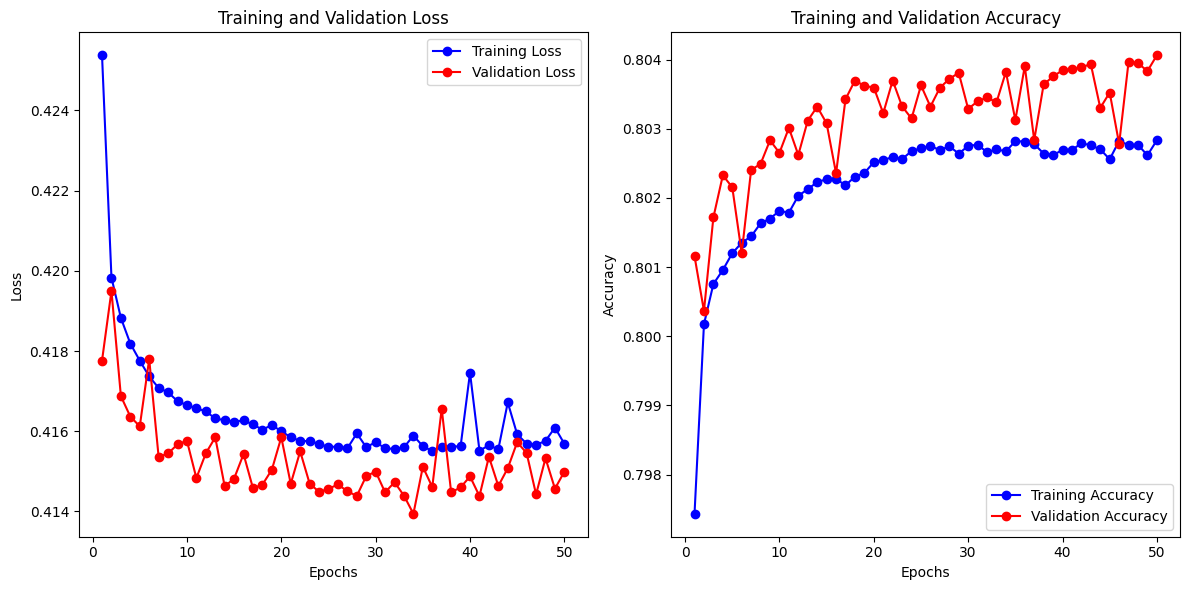

In [19]:
import matplotlib.pyplot as plt

# Extract the history object from the training process
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Extract training and validation metrics from the history object
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Logic NO.3 - Using the StratifiedKFold with Catboost 

In [ ]:
import numpy as np
import pandas as pd
import polars as pl

orig_train = pl.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
print("Original train shape",orig_train.shape)
display(orig_train.head())
print()

train = pl.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
print("Train shape",train.shape)
display(train.head())
print()

train = pl.concat([train, orig_train])
print("Train + orig_train shape",train.shape)
display(train.head())
print()

test = pl.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
print("Test shape",test.shape)
display(test.head())

target = 'Response'
test = test.with_columns(pl.lit(0).cast(pl.Int64).alias(target))

In [ ]:
df = pl.concat([train, test])

df = df.with_columns([
    pl.col('Gender').replace({'Male': 0, 'Female': 1}).cast(pl.Int32),
    pl.col('Region_Code').cast(int),
    pl.col('Vehicle_Age').replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}).cast(pl.Int32),
    pl.col('Vehicle_Damage').replace({'No': 0, 'Yes': 1}).cast(pl.Int32),
    pl.col('Annual_Premium').cast(int),
    pl.col('Policy_Sales_Channel').cast(int)
])

df = df.with_columns([
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Annual_Premium'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Annual_Premium'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vehicle_Age'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vehicle_Age'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vehicle_Damage'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vehicle_Damage'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vintage'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vintage')
])

train = df[:train.shape[0]].to_pandas()
test = df[train.shape[0]:].to_pandas()
    
X = train.drop(['id', target], axis=1)
y = train[target]
X_test = test.drop(['id', target], axis=1)

display(y.value_counts())
display(train.head())
print()
display(test.head())

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import catboost as cb
from catboost import Pool
import gc

FOLDS = 2
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
test_preds = np.zeros((len(X_test), FOLDS), dtype=np.float32)
scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print("#" * 25)
    print(f"# Fold {fold + 1}")
    print("#" * 25)
    X_train_fold = X.loc[train_idx]
    y_train_fold = y.loc[train_idx].values
    X_val_fold = X.loc[val_idx]
    y_val_fold = y.loc[val_idx].values
    X_train_pool = Pool(X_train_fold, y_train_fold, cat_features=X.columns.values)
    X_val_pool = Pool(X_val_fold, y_val_fold, cat_features=X.columns.values)
    X_test_pool = Pool(X_test, cat_features=X_test.columns.values)
    
    # Train CatBoost
    model = cb.CatBoostClassifier(
        loss_function='Logloss',
        eval_metric='AUC',
        class_names=[0, 1],
        learning_rate=0.075,
        iterations=5000,
        depth=9,
        random_strength=0,
        l2_leaf_reg=0.5,
        max_leaves=512,
        fold_permutation_block=64,
        task_type='GPU',
        random_seed=42,
        verbose=False
    )

    model.fit(X=X_train_pool, 
              eval_set=X_val_pool, 
              verbose=500, 
              early_stopping_rounds=200)
    score = model.best_score_['validation']['AUC']
    print('Fold ROC-AUC score: ', score)
    scores.append(score)

    test_preds[:, fold] = model.predict_proba(X_test)[:, 1]
    
    del X_train_fold, y_train_fold
    del X_val_fold, y_val_fold
    del X_train_pool, X_val_pool, X_test_pool
    del model
    gc.collect()

print('Mean ROC-AUC score: ', sum(scores) / FOLDS)

test_preds = np.mean(test_preds, axis=1)
submission = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
submission[target] = test_preds.astype(np.float32)
submission['id'] = submission['id'].astype(np.int32)
submission.to_csv('submission16.csv', index=False)
submission

# At last we use the kfold method which perform well and we got accuracy upto 0.89595 that helped me to hold **215** position on the kaggle leaderboard in Binary Classification competition